## Read data

In [11]:
import pandas as pd
import numpy as np
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
sales = pd.read_csv('kc_house_data.csv/kc_house_data.csv', dtype=dtype_dict)

In [4]:
from math import log, sqrt
sales['sqft_living_sqrt'] = sales['sqft_living'].apply(sqrt)
sales['sqft_lot_sqrt'] = sales['sqft_lot'].apply(sqrt)
sales['bedrooms_square'] = sales['bedrooms']*sales['bedrooms']
sales['floors_square'] = sales['floors']*sales['floors']

## Fit lasso model using sklearn

In [6]:
from sklearn import linear_model
all_features = ['bedrooms', 'bedrooms_square',
            'bathrooms',
            'sqft_living', 'sqft_living_sqrt',
            'sqft_lot', 'sqft_lot_sqrt',
            'floors', 'floors_square',
            'waterfront', 'view', 'condition', 'grade',
            'sqft_above',
            'sqft_basement',
            'yr_built', 'yr_renovated']
model_all = linear_model.Lasso(alpha = 5e2, normalize = True)
model_all.fit(sales[all_features], sales['price'])


Lasso(alpha=500.0, normalize=True)

In [32]:
model_all.coef_
print(all_features[3], all_features[10], all_features[12])

sqft_living view grade


In [12]:
testing = pd.read_csv('wk3_kc_house_test_data.csv/wk3_kc_house_test_data.csv', dtype=dtype_dict)
training = pd.read_csv('wk3_kc_house_train_data.csv/wk3_kc_house_train_data.csv', dtype=dtype_dict)
validation = pd.read_csv('wk3_kc_house_valid_data.csv/wk3_kc_house_valid_data.csv', dtype=dtype_dict)

In [13]:
testing['sqft_living_sqrt'] = testing['sqft_living'].apply(sqrt)
testing['sqft_lot_sqrt'] = testing['sqft_lot'].apply(sqrt)
testing['bedrooms_square'] = testing['bedrooms']*testing['bedrooms']
testing['floors_square'] = testing['floors']*testing['floors']

training['sqft_living_sqrt'] = training['sqft_living'].apply(sqrt)
training['sqft_lot_sqrt'] = training['sqft_lot'].apply(sqrt)
training['bedrooms_square'] = training['bedrooms']*training['bedrooms']
training['floors_square'] = training['floors']*training['floors']

validation['sqft_living_sqrt'] = validation['sqft_living'].apply(sqrt)
validation['sqft_lot_sqrt'] = validation['sqft_lot'].apply(sqrt)
validation['bedrooms_square'] = validation['bedrooms']*validation['bedrooms']
validation['floors_square'] = validation['floors']*validation['floors']

In [46]:
RSS = np.ones(13)
n = 0
for i in np.logspace(1,7,num=13):
    model = linear_model.Lasso(alpha = i, normalize = True)
    model.fit(training[all_features], training['price'])
    prediction = model.predict(validation[all_features])
    RSS[n] = sum((validation['price']-prediction)**2)
    n+=1

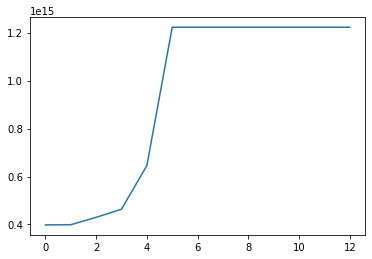

In [25]:
from matplotlib import pyplot
pyplot.plot(list(range(13)), RSS)

In [114]:
model = linear_model.Lasso(alpha =10, normalize = True)    ##tesing use training fit model???
model.fit(training[all_features], training['price'])
prediction = model.predict(testing[all_features])
RSS = sum((testing['price']-prediction)**2)
model.coef_

array([-1.61445628e+04,  3.73245384e+02,  5.08412433e+04,  6.17853560e+02,
       -4.44113549e+04,  7.85623065e-01, -7.01194765e+02, -0.00000000e+00,
        5.01420046e+03,  6.19488752e+05,  3.80418557e+04,  2.49987718e+04,
        1.28716235e+05,  0.00000000e+00,  0.00000000e+00, -3.29383118e+03,
        1.00573209e+01])

In [115]:
np.count_nonzero(model.coef_) + np.count_nonzero(model.intercept_)

15

## Feature selection with exact 7 features

In [134]:
num = np.zeros(20)
weights = np.zeros((20, 18))
n=0
for i in np.logspace(1, 4, num=20):
    model = linear_model.Lasso(alpha = i, normalize=True)
    model.fit(training[all_features], training['price'])
    num[n] = np.count_nonzero(model.coef_)+np.count_nonzero(model.intercept_)
    weights[n, :] = [*model.coef_ , *np.array([model.intercept_])] 
    n+=1

In [75]:
num

array([15., 15., 15., 15., 13., 12., 11., 10.,  7.,  6.,  6.,  6.,  5.,
        3.,  3.,  2.,  1.,  1.,  1.,  1.])

In [143]:
l1_penalty_min = np.logspace(1, 4, num=20)[7]    #find a small range of l1_penalty(likely conatain 7 features)
l1_penalty_max = np.logspace(1, 4, num=20)[9]
l1_penalty_min
l1_penalty_max

263.6650898730358

In [144]:
num2 = np.zeros(20)
RSS = np.zeros(20)
weights = np.zeros((20, 18))
n=0
for i in np.linspace(l1_penalty_min, l1_penalty_max, num=20):
    model = linear_model.Lasso(alpha = i, normalize=True)
    model.fit(training[all_features], training['price'])
    prediction = model.predict(validation[all_features])
    RSS[n] = sum((prediction-validation['price'])**2)
    num2[n] = np.count_nonzero(model.coef_)+np.count_nonzero(model.intercept_)    
    weights[n, :] = [*model.coef_ , *np.array([model.intercept_])]
    n+=1

In [145]:
np.linspace(l1_penalty_min, l1_penalty_max, num=20)

array([127.42749857, 134.59789811, 141.76829765, 148.9386972 ,
       156.10909674, 163.27949628, 170.44989582, 177.62029537,
       184.79069491, 191.96109445, 199.13149399, 206.30189354,
       213.47229308, 220.64269262, 227.81309216, 234.9834917 ,
       242.15389125, 249.32429079, 256.49469033, 263.66508987])

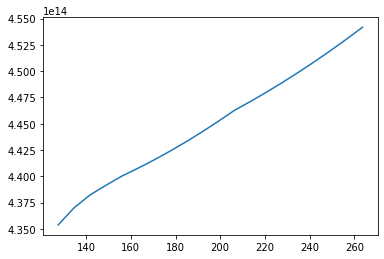

In [146]:
from matplotlib import pyplot as plt
plt.plot(np.linspace(l1_penalty_min, l1_penalty_max, num=20), RSS)

In [148]:
print(np.where(num2==7))
print(weights[4])
print(np.where(weights[4] != 0))
print(all_features[2], all_features[3], all_features[9],
      all_features[10],all_features[12],all_features[15])

(array([ 4,  5,  6,  7,  8,  9, 10]),)
[-0.00000000e+00 -0.00000000e+00  1.06108903e+04  1.63380252e+02
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.06451687e+05  4.19600436e+04  0.00000000e+00
  1.16253554e+05  0.00000000e+00  0.00000000e+00 -2.61223488e+03
  0.00000000e+00  4.42219028e+06]
(array([ 2,  3,  9, 10, 12, 15, 17]),)
bathrooms sqft_living waterfront view grade yr_built
